In [1]:
# Loading the useful data from Step 1
import pandas as pd
import numpy as np
import pickle

In [2]:
f=open('first_df.pkl','rb')
df=pickle.load(f)
f.close()

In [3]:
df.sample(2)

,story,role,story_point
151,As a Staff member I want to Send or Post Cita...,staff,12
454,As a content designer I want to develop a bet...,designer,6


In [4]:
# Set option to see more of a story 
pd.set_option('display.max_colwidth',150)

In [5]:
df.sample(2)

,story,role,story_point
1307,As a repository manager I want to indicate names related to the collection either as creator source or subject.,manager,13
692,As a DigitalRecords Archivist I want to have a method to add and remove multiple people to deposit groups in specific collections to set a date ...,archivist,19


In [6]:
# Try to have a glimpse of data through wordclod
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
# We need to make a big text out of our data frame to generate the wordcloud
text=''
for i in range(df.shape[0]):
    text+=df['story'][i]
    

In [8]:
len(text)

216103

In [9]:
wc=WordCloud(width=600,height=300).generate(text)

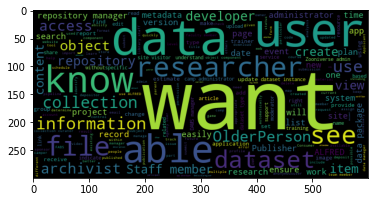

In [10]:
plt.imshow(wc)

<AxesSubplot:xlabel='story_point', ylabel='role'>

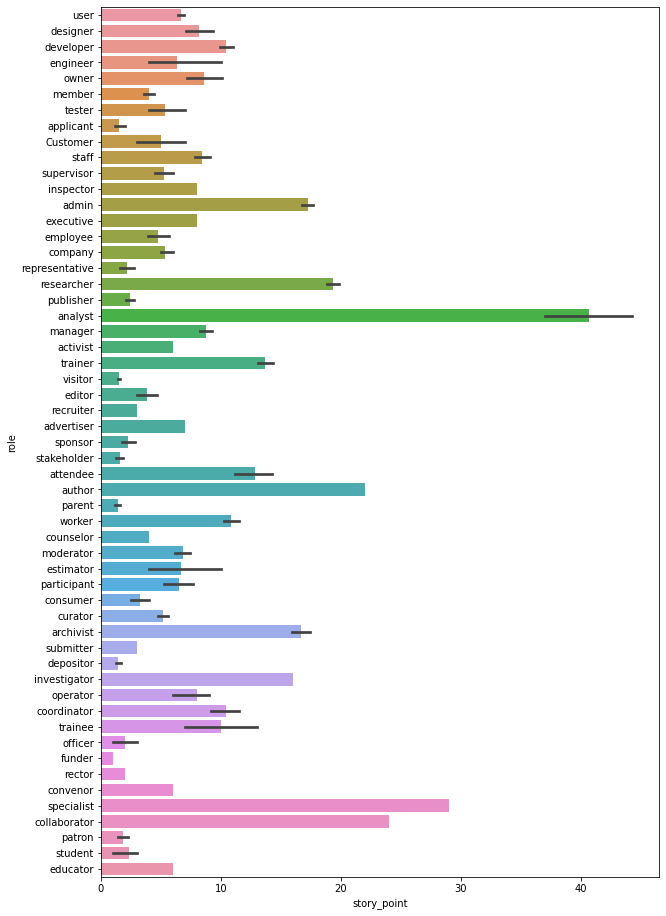

In [11]:
# Plotting role vs story points
import seaborn as sns
plt.figure(figsize=(10,16))
sns.barplot(y=df['role'],x=df['story_point'])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   story        1671 non-null   object
 1   role         1671 non-null   object
 2   story_point  1671 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 39.3+ KB


In [13]:
# story_points need not be in int64, its an overkill. int8 is perfect
df['story_point']=df['story_point'].astype('int8')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   story        1671 non-null   object
 1   role         1671 non-null   object
 2   story_point  1671 non-null   int8  
dtypes: int8(1), object(2)
memory usage: 27.9+ KB


# Preprocessing

## 1. cheking for duplicates

In [15]:
df.duplicated().sum()

0

## 2. Check for null Values

In [16]:
df.isnull().sum()

story          0
role           0
story_point    0
dtype: int64

## 3. Lower Casing

In [17]:
df['story']=df['story'].str.lower()
df['role']=df['role'].str.lower()

In [18]:
df.head(2)

,story,role,story_point
0,as a data user i want to have the 12-19-2017 deletions processed.,user,9
1,as a ui designer i want to redesign the resources page so that it matches the new broker design styles.,designer,5


In [19]:
# Check for HTML Tags
df[df['story'].str.find('<') != -1]

,story,role,story_point


In [20]:
# Check for urls
df[df['story'].str.find('http') != -1]

,story,role,story_point
296,as a researcher i want an integration with https://data.mendeley.com/ so that i can validate my data upon ingest to the service.,researcher,15


## 4. Removing URLs


In [21]:
import re
def remove_url(text):
    ''' To clean any url from a text '''
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)


In [22]:
df['story']=df['story'].apply(remove_url)

In [23]:
df.head(2)

,story,role,story_point
0,as a data user i want to have the 12-19-2017 deletions processed.,user,9
1,as a ui designer i want to redesign the resources page so that it matches the new broker design styles.,designer,5


## 5. Removing Punctuations

In [24]:
import string
punc=string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def remove_punctuations(text):
    for ch in punc:
        text=text.replace(ch,'')
    return text


In [26]:
remove_punctuations(df['story'][0])

'as a data user  i want to have the 12192017 deletions processed'

In [27]:
df['story']=df['story'].apply(remove_punctuations)

## 6. Removing Stopwords
##### Note: Stopwords are words which do not add much meaning to the sentences wrt ML

In [28]:
from nltk.corpus import stopwords
sw=stopwords.words('english')

In [29]:
def remove_stopwords(text):
    doc=[]
    for word in text.split():
        if word not in sw:
            doc.append(word)
    return ' '.join(doc)


In [30]:
remove_stopwords(df['story'][0])

'data user want 12192017 deletions processed'

In [31]:
df['story']=df['story'].apply(remove_stopwords)

In [32]:
df.sample(5)

,story,role,story_point
876,researcher want ability attach standard meta data drug responses data later searched understood,researcher,19
534,parent want able see made necessary payments,parent,1
662,admin want pricing plan billing system charge users make platform sustainable,admin,23
657,owner want view people organization roles change want,owner,5
1032,serious games developer want able take control functions provide desired user experience,developer,8


## 7. Tokenization

In [33]:
# Splitting sentences into tokens/words
from nltk.tokenize import word_tokenize


In [34]:
df['story']=df['story'].apply(lambda x: word_tokenize(x))

In [35]:
df.sample(2)

,story,role,story_point
1318,"[repository, manager, want, indicate, copyright, status, object]",manager,10
1586,"[dbir, administrator, want, unpublish, reportdataset, requested, usda, agency]",admin,19


## 8. Stemming

In [36]:
# Stemming is done to bring each words in to their root/base form
from nltk.stem import PorterStemmer
ps=PorterStemmer()


In [37]:
df['story']=df['story'].apply(lambda x: ' '.join(ps.stem(word) for word in x))

In [38]:
df

,story,role,story_point
0,data user want 12192017 delet process,user,9
1,ui design want redesign resourc page match new broker design style,designer,5
2,ui design want report agenc user test awar contribut make broker better ux,designer,8
3,ui design want move round 2 dab fab land page edit get approv leadership,designer,5
4,ui design want move round 2 homepag edit get approv leadership,designer,8
...,...,...,...
1666,zoonivers admin want know zoonibot give explan,admin,17
1667,zoonivers admin want know zoonibot say volunt,admin,22
1668,zoonivers admin want group subject similar,admin,15
1669,zoonivers admin want recommend differ project volunt base previou experi,admin,13


### Here most of the steps for Text Preprocessing is complete.
### We can now pickle the pre-processed data for Step 3 i.e. Vectorization and Training

In [39]:
f=open('preprocessed_data.pkl','wb')
pickle.dump(df,f)
f.close()

In [40]:
# Check for proper pickling
k=open('preprocessed_data.pkl','rb')
pdf=pickle.load(k)
k.close()

In [41]:
pdf

,story,role,story_point
0,data user want 12192017 delet process,user,9
1,ui design want redesign resourc page match new broker design style,designer,5
2,ui design want report agenc user test awar contribut make broker better ux,designer,8
3,ui design want move round 2 dab fab land page edit get approv leadership,designer,5
4,ui design want move round 2 homepag edit get approv leadership,designer,8
...,...,...,...
1666,zoonivers admin want know zoonibot give explan,admin,17
1667,zoonivers admin want know zoonibot say volunt,admin,22
1668,zoonivers admin want group subject similar,admin,15
1669,zoonivers admin want recommend differ project volunt base previou experi,admin,13
